In [2]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

## Data partition

In [3]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [4]:
dim(train)
dim(test)

[1] 747  78

[1] 321  78

In [5]:
table(df$deg_cat)


Accettabile  Complicato      Ottimo 
        519         406         143 

In [3]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


Accettabile  Complicato      Ottimo 
        249         249         249 

## Model

In [4]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [5]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 

+ Fold01.Rep1: nIter=47 
- Fold01.Rep1: nIter=47 
+ Fold02.Rep1: nIter=47 
- Fold02.Rep1: nIter=47 
+ Fold03.Rep1: nIter=47 
- Fold03.Rep1: nIter=47 
+ Fold04.Rep1: nIter=47 
- Fold04.Rep1: nIter=47 
+ Fold05.Rep1: nIter=47 
- Fold05.Rep1: nIter=47 
+ Fold06.Rep1: nIter=47 
- Fold06.Rep1: nIter=47 
+ Fold07.Rep1: nIter=47 
- Fold07.Rep1: nIter=47 
+ Fold08.Rep1: nIter=47 
- Fold08.Rep1: nIter=47 
+ Fold09.Rep1: nIter=47 
- Fold09.Rep1: nIter=47 
+ Fold10.Rep1: nIter=47 
- Fold10.Rep1: nIter=47 
Aggregating results
Selecting tuning parameters
Fitting nIter = 37 on full training set


In [6]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=0.306935, loss=L1, epsilon=1 
- Fold01.Rep1: cost=0.306935, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=0.306935, loss=L1, epsilon=1 
- Fold02.Rep1: cost=0.306935, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=0.054620, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=0.306935, loss=L1, epsilon=1 
- Fold03.Rep1: cost=0.306935, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=0.003352, loss=L2_dual, epsilon=1 
+ Fold04.Rep1: cost=0.054620, loss=L2_du

## Results

Boosted Logistic Regression 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 672, 673, 673, 672, 672, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
   6     0.6374120  0.4476956
  37     0.6515218  0.4719357
  47     0.6400560  0.4571945

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 37.


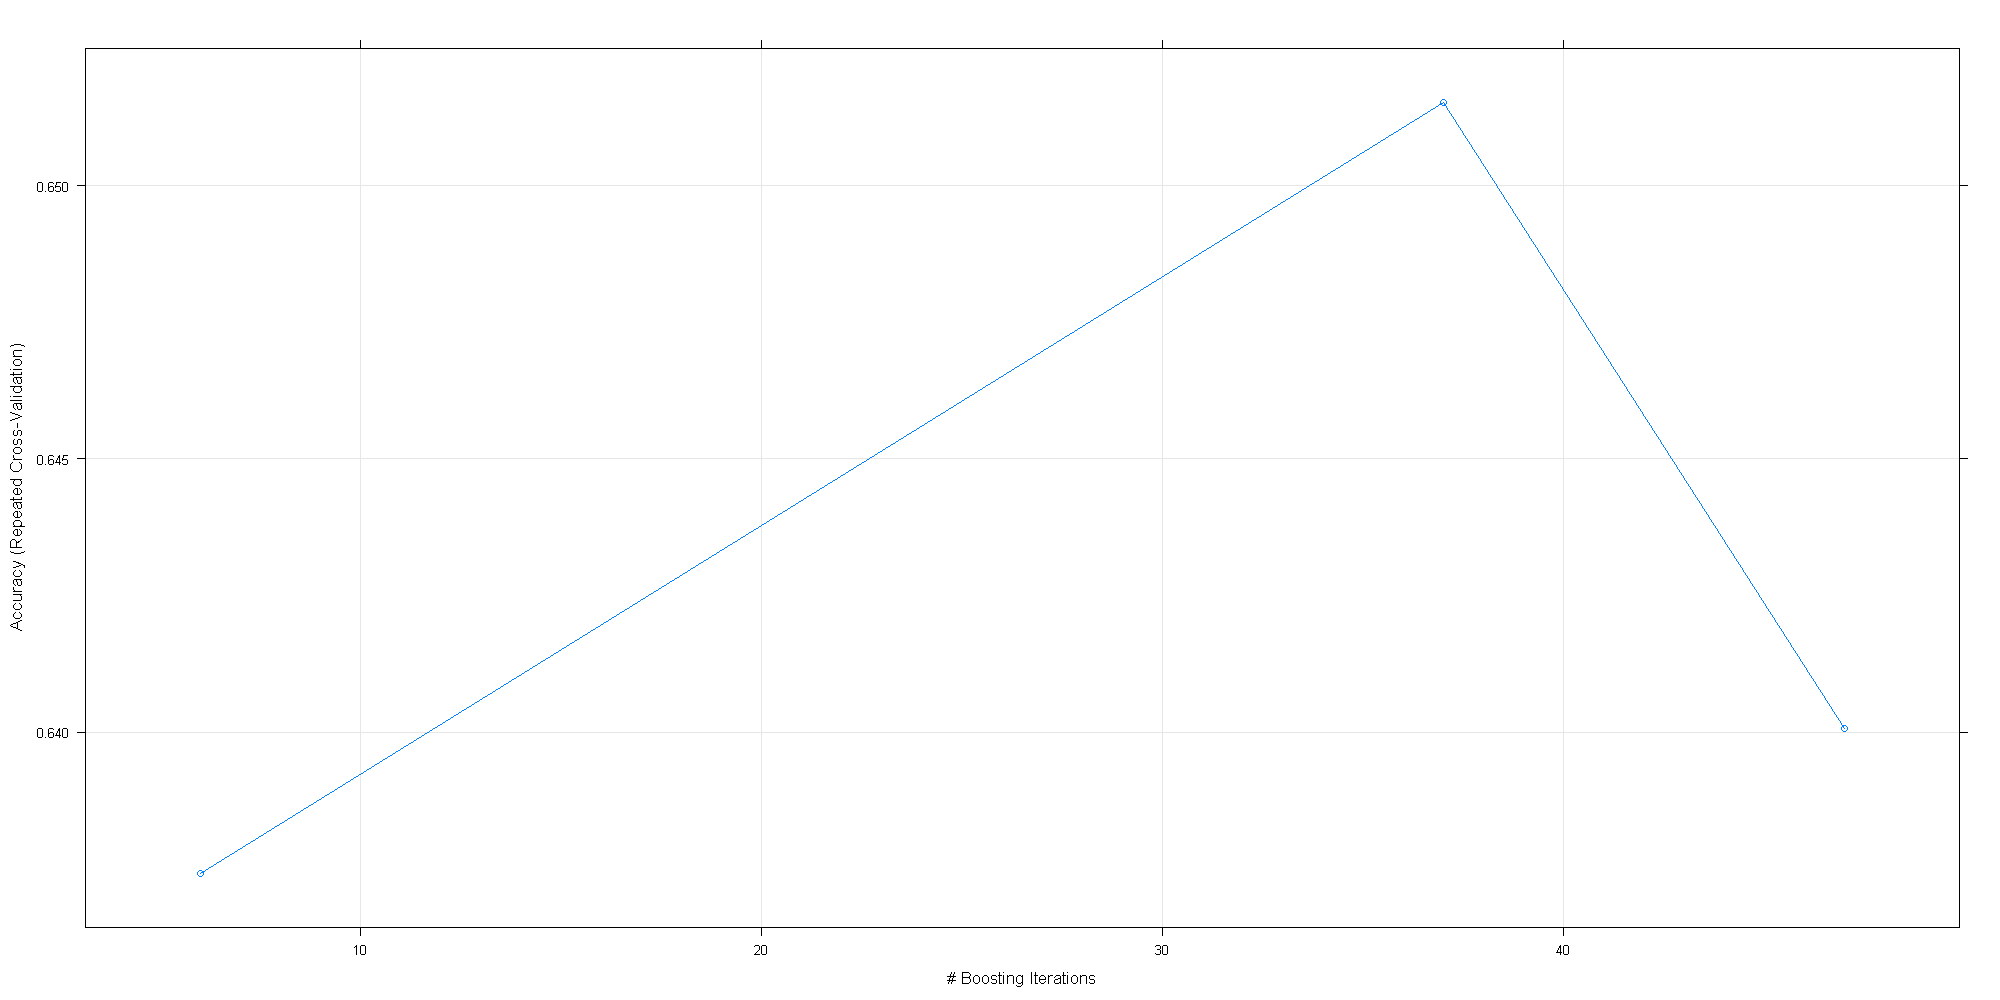

In [7]:
print(model_logitBoost)
plot(model_logitBoost)

Regularized Logistic Regression 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 672, 672, 672, 672, 675, ... 
Resampling results across tuning parameters:

  cost        loss     Accuracy   Kappa    
  0.00335166  L2_dual  0.5916111  0.3874167
  0.05462050  L2_dual  0.6413333  0.4620000
  0.30693526  L1       0.6048333  0.4072500

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.0546205, loss = L2_dual
 and epsilon = 1.


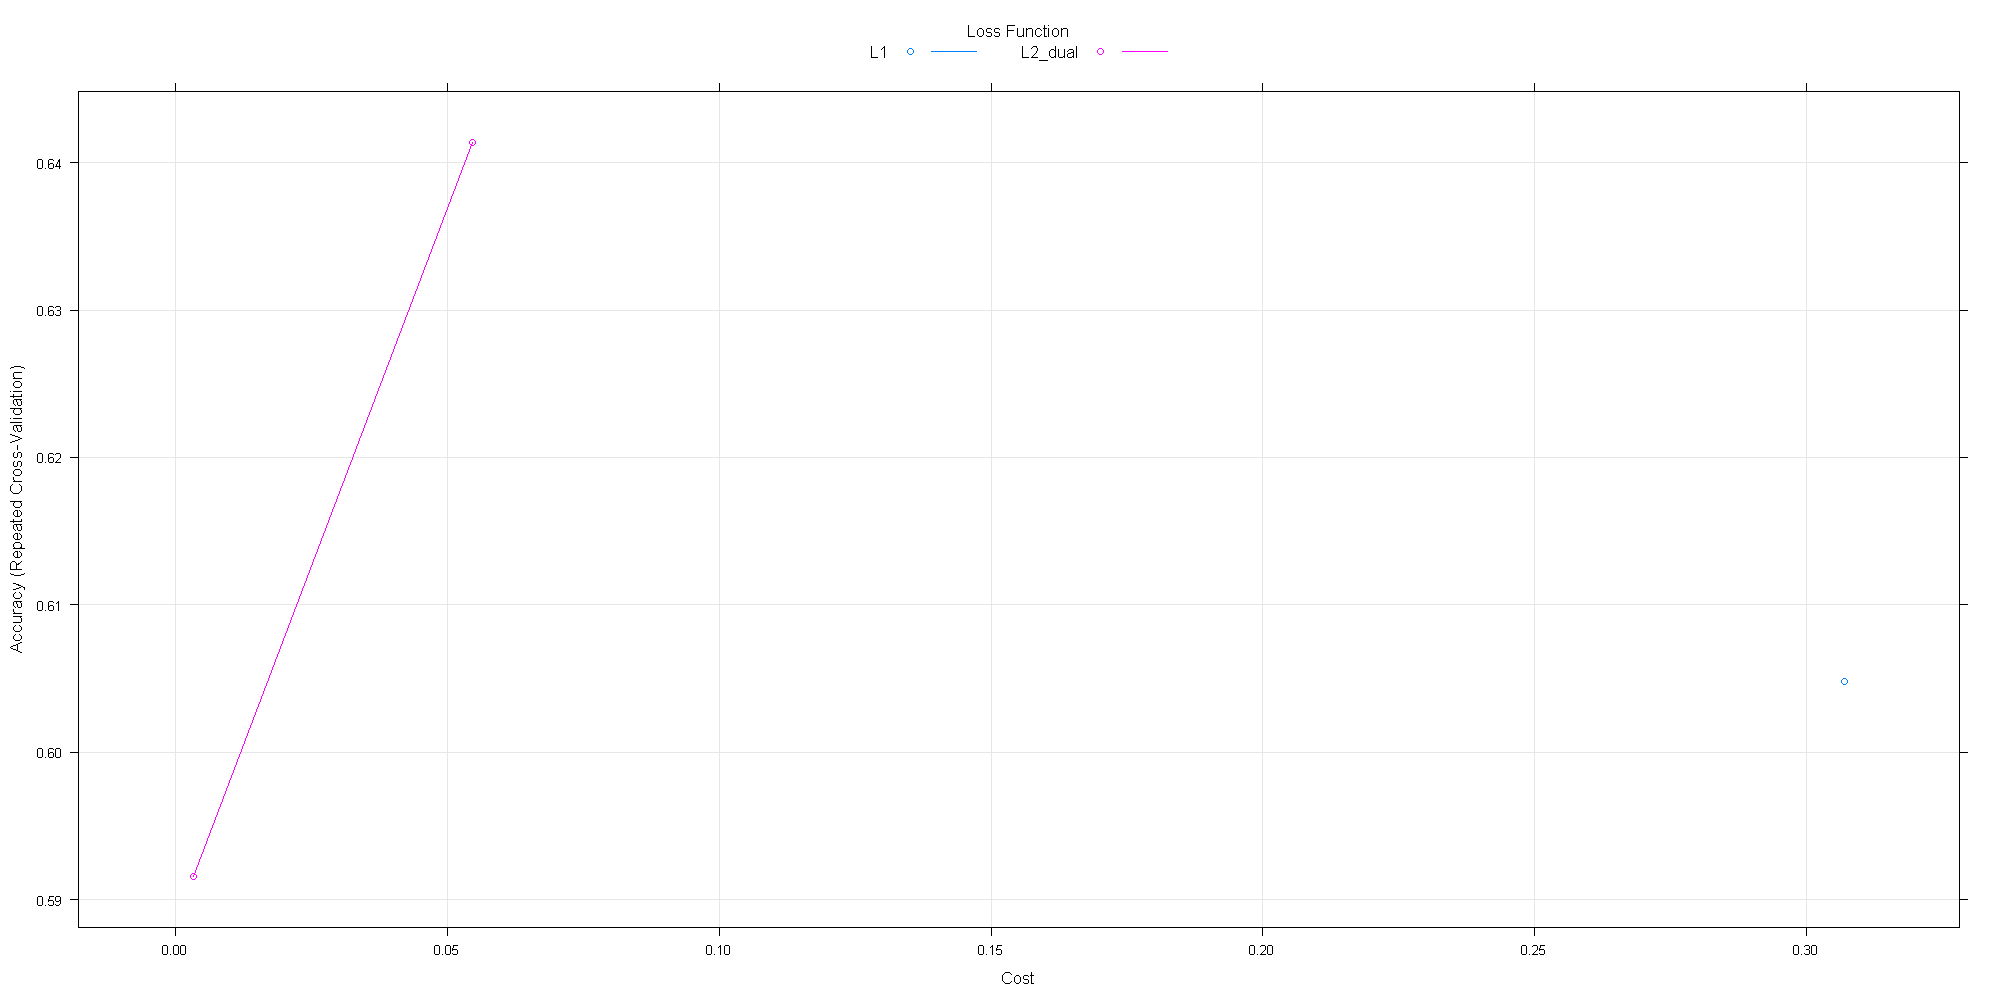

In [8]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.5901639 0.6246082 0.6526791 0.6515218 0.6804687 0.7192982    0
regLogistic 0.6000000 0.6266667 0.6400000 0.6413333 0.6666667 0.6800000    0

Kappa 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.368984 0.4320243 0.4781834 0.4719357 0.5194956 0.5625899    0
regLogistic 0.400000 0.4400000 0.4600000 0.4620000 0.5000000 0.5200000    0


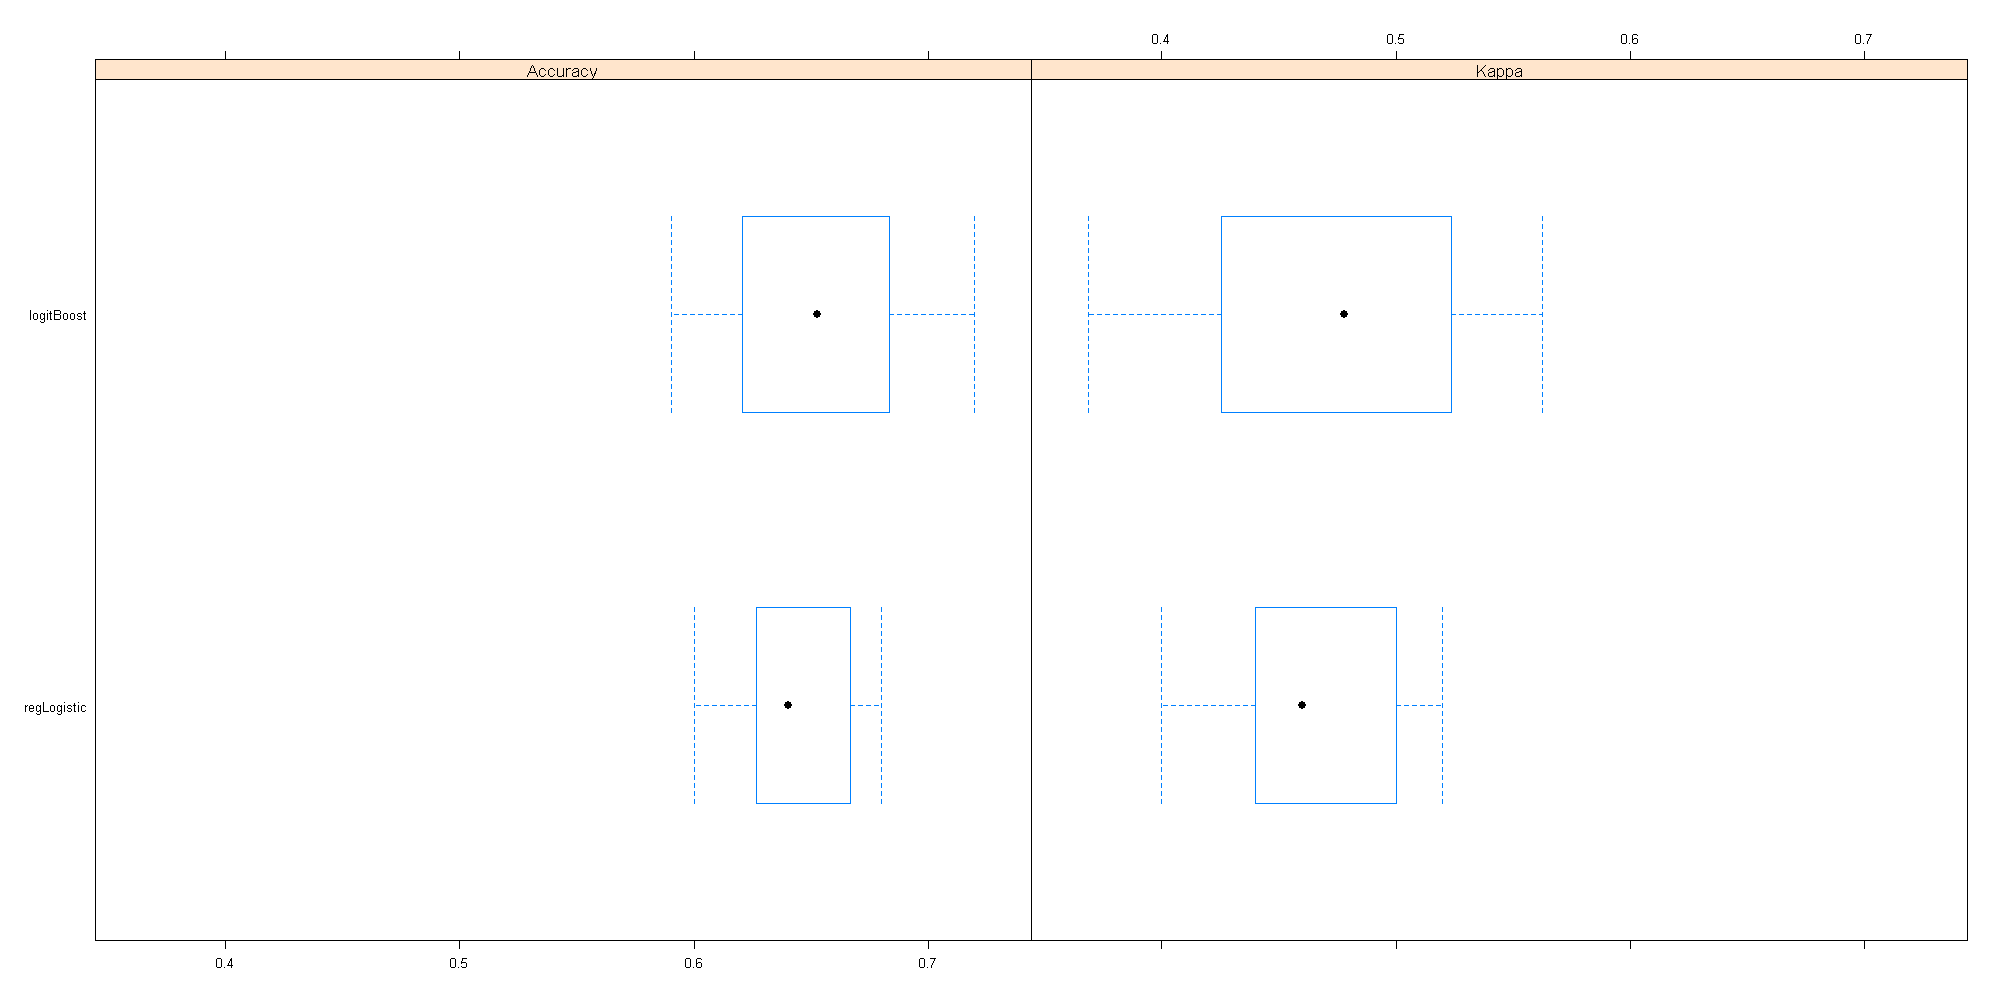

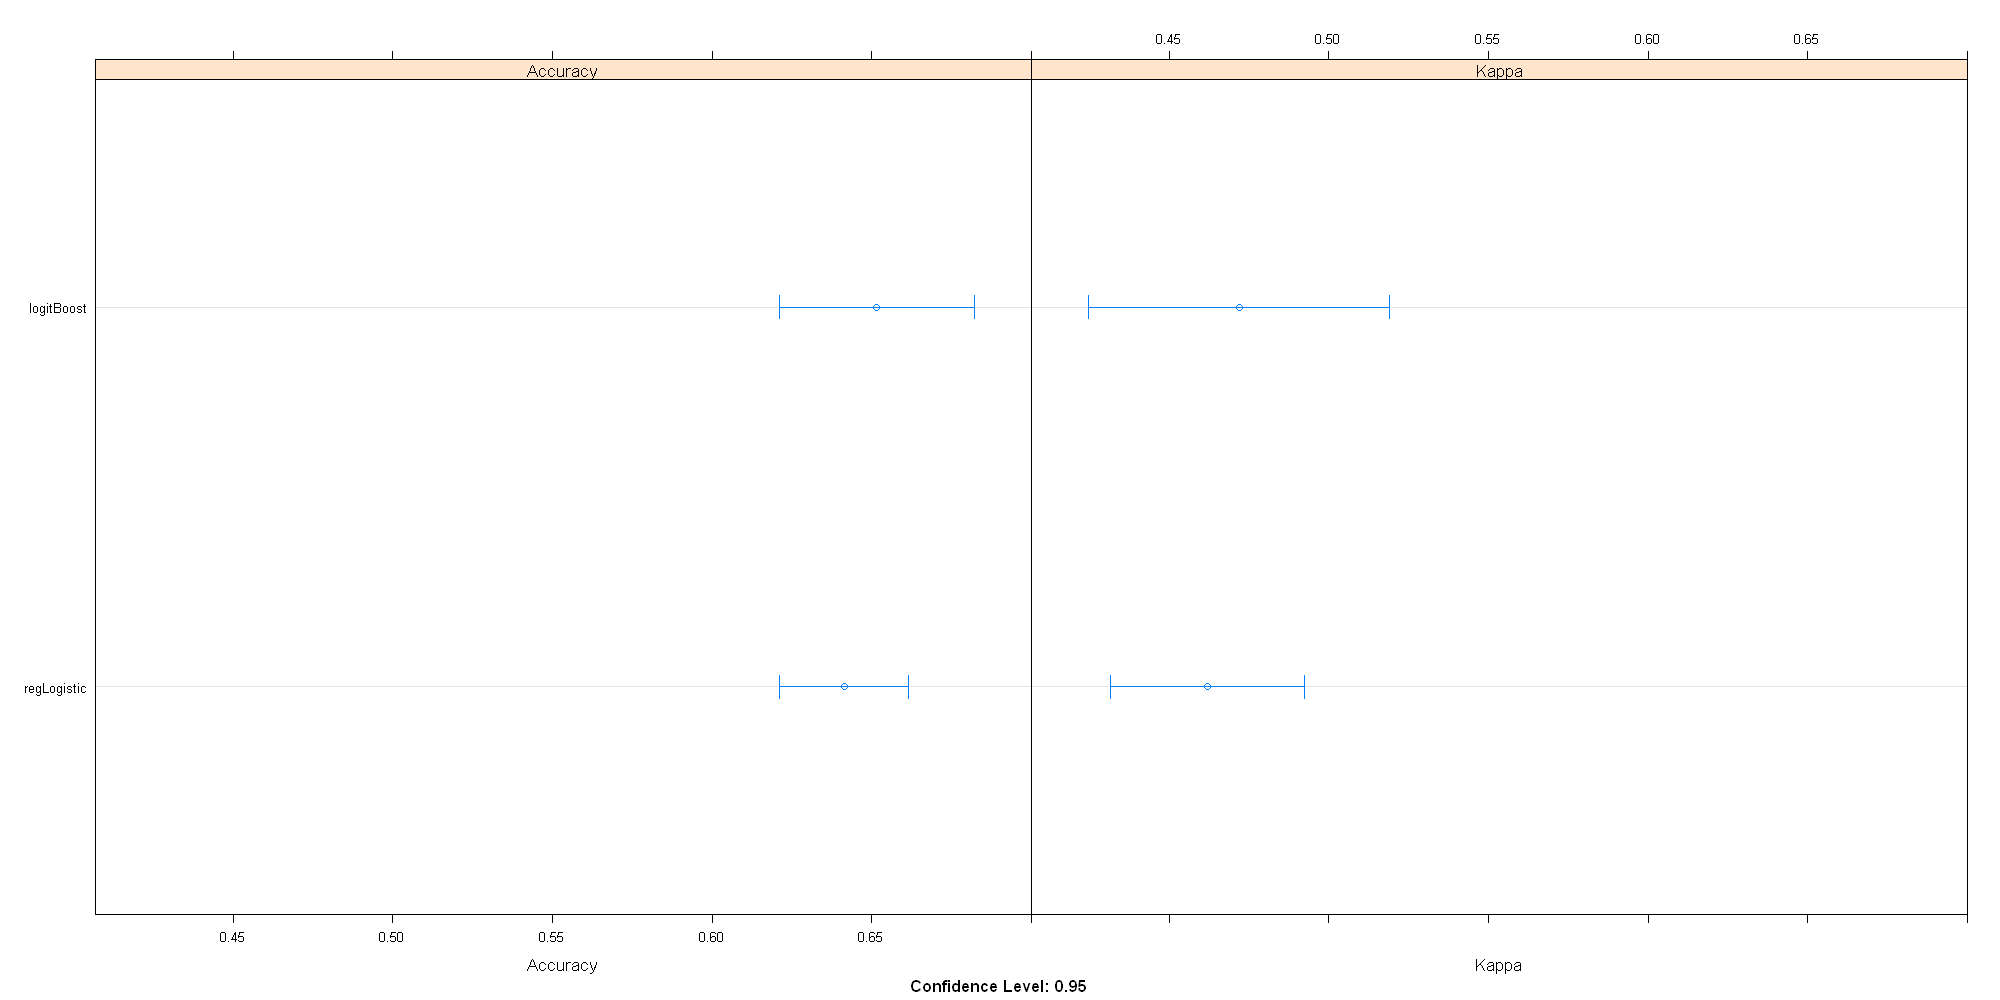

In [9]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [10]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile          51         47     24
  Complicato           28         66      7
  Ottimo               14          6     16

Overall Statistics
                                          
               Accuracy : 0.5135          
                 95% CI : (0.4509, 0.5759)
    No Information Rate : 0.4595          
    P-Value [Acc > NIR] : 0.04637         
                                          
                  Kappa : 0.2234          
                                          
 Mcnemar's Test P-Value : 0.05700         

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5484            0.5546       0.34043
Specificity                      0.5723            0.7500       0.90566
Pos Pred Value                   0.4180            0.6535       0.44444
Neg Pred Value                   0.6934           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5483871,0.5722892,0.4180328,0.6934307,0.4180328,0.5483871,0.4744186,0.3590734,0.19691120,0.4710425,0.5603381
Class: Complicato,0.5546218,0.7500000,0.6534653,0.6645570,0.6534653,0.5546218,0.6000000,0.4594595,0.25482625,0.3899614,0.6523109
Class: Ottimo,0.3404255,0.9056604,0.4444444,0.8609865,0.4444444,0.3404255,0.3855422,0.1814672,0.06177606,0.1389961,0.6230430


In [11]:
roc_logitBoost <- multiclass.roc(TestClasses, as.numeric(pred_logitBoost))
roc_logitBoost


Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.5623

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

percent,FALSE,FALSE
sensitivities,"1.0000000, 0.6111111, 0.4444444, 0.0000000","1.0000000, 0.6111111, 0.4444444, 0.0000000"
specificities,"0.0000000, 0.4180328, 0.8032787, 1.0000000","0.0000000, 0.2772277, 0.9306931, 1.0000000"
thresholds,"-Inf, 1.5, 2.5, Inf","-Inf, 1.5, 2.5, Inf"
direction,<,<
cases,"3, 3, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3","3, 3, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3"
controls,"3, 2, 2, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1, 2, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 1, 3, 1, 3, 1, 1, 2, 1, 1, 2, 3, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2","2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1"
fun.sesp,"function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }","function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }"
call,"roc.default(response = response, predictor = predictor, levels = X, , percent = percent, direction = ..1, auc = FALSE, ci = FALSE)","roc.default(response = response, predictor = predictor, levels = X, , percent = percent, direction = ..1, auc = FALSE, ci = FALSE)"
original.predictor,"3, 2, NA, NA, 2, NA, 3, NA, 3, 2, 1, NA, 2, NA, 3, 1, 2, 3, NA, 1, NA, NA

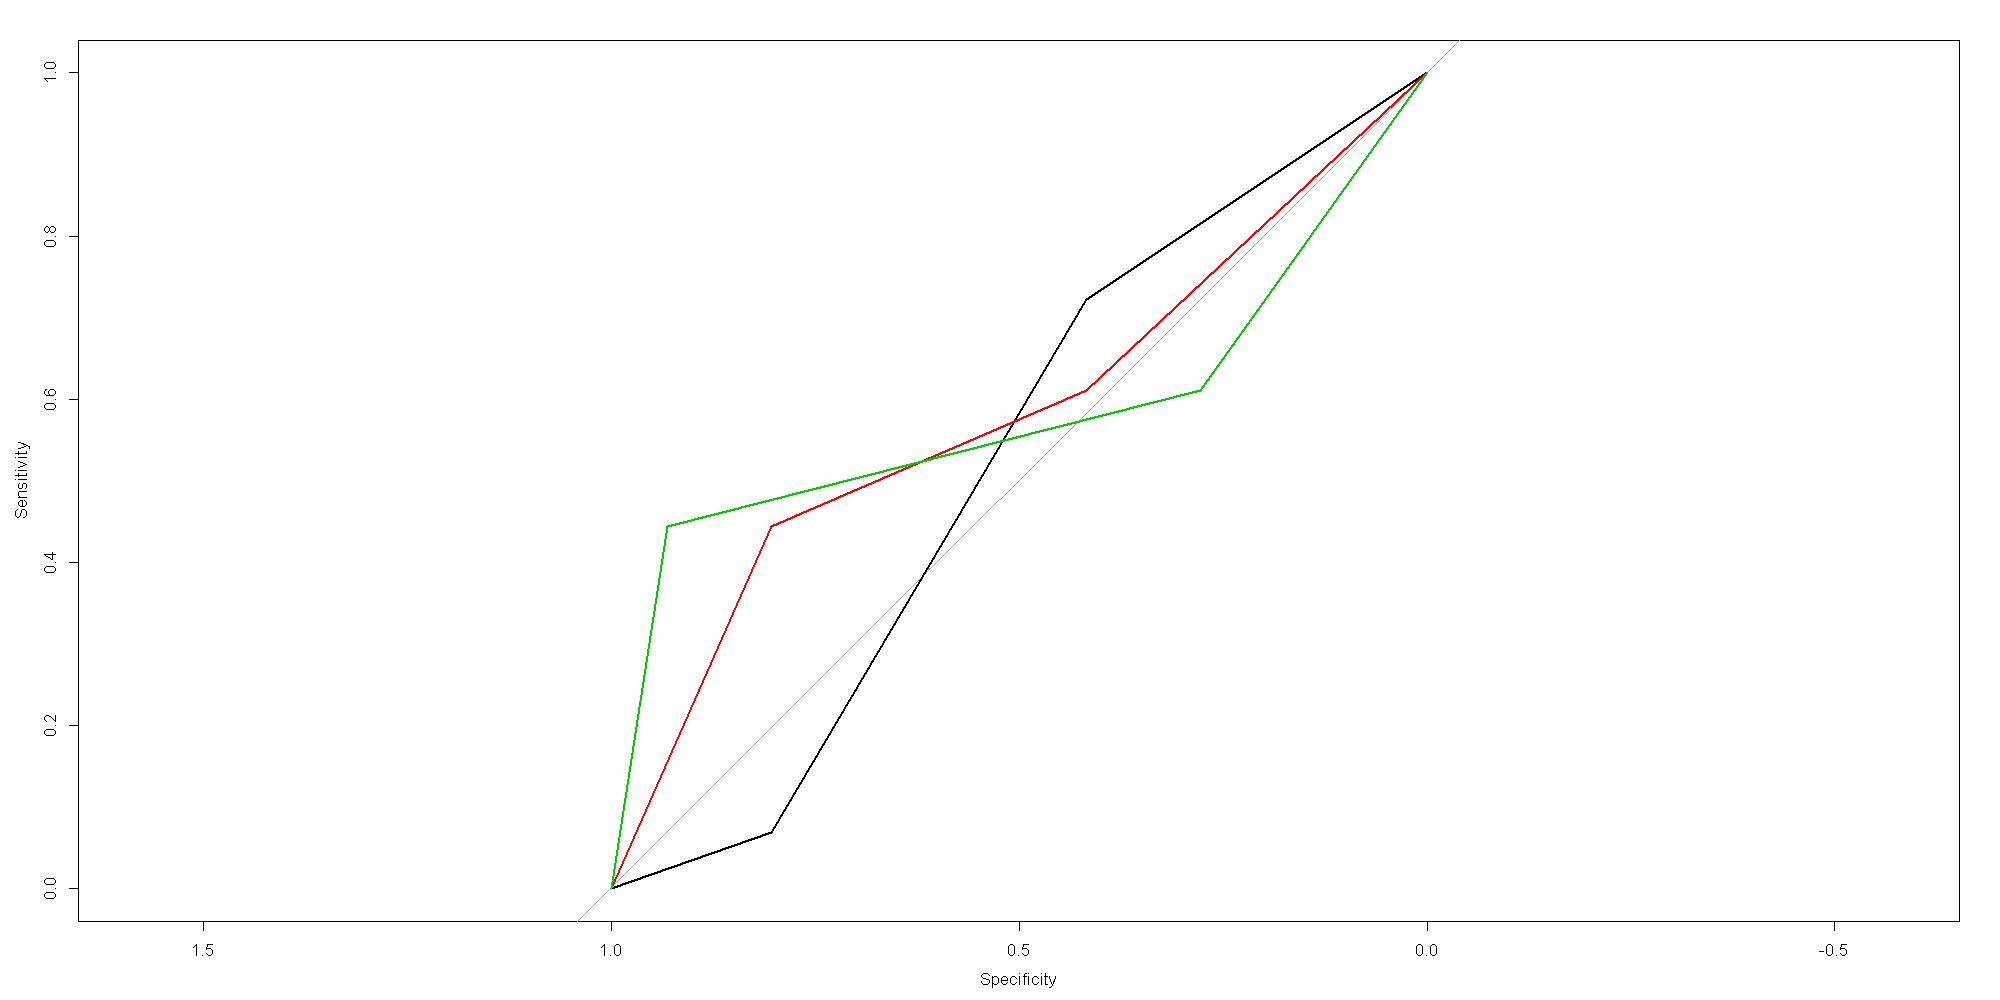

In [13]:
rs <- roc_logitBoost[['rocs']]
plot.roc(rs[[1]])
sapply(2:length(rs),function(i) lines.roc(rs[[i]],col=i))

In [12]:
pred_logitBoost.prob

Accettabile,Complicato,Ottimo
0.2671534035,0.0066483545,0.7261982421
0.0453125755,0.9545695284,0.0001178961
0.4594864455,0.4594864455,0.0810271091
0.4996886420,0.4996886420,0.0006227161
0.2119415576,0.7827840847,0.0052743577
0.3333333333,0.3333333333,0.3333333333
0.4893044387,0.0004679755,0.5102275858
0.4842913146,0.0314173708,0.4842913146
0.0452785007,0.0452785007,0.9094429985
0.0455298258,0.9535955461,0.0008746281
